## Estudios de Saliencia

Los estudios de saliencia se centran en identificar y resaltar las áreas de una imagen que captan más la atención visual, conocidas como regiones salientes. Estos estudios son fundamentales en campos como la visión por computadora, la compresión de imágenes, la segmentación y el reconocimiento de objetos, ya que ayudan a enfocar el procesamiento en las partes más relevantes de la imagen. La saliencia puede definirse a partir de distintas características visuales como el contraste de color, la orientación, la intensidad luminosa o diferencias texturales. Los algoritmos de saliencia buscan emular cómo el sistema visual humano detecta automáticamente los objetos y las áreas de interés en una escena compleja.



## Modelo Utilizado

En este caso, se utiliza el método de Histogram-based Contrast en conjunto con la técnica StaticSaliencySpectralResidual proporcionada por la biblioteca OpenCV. Este modelo se basa en el enfoque de saliencia espectral residual, que fue propuesto por Xiaodi Hou y Liqing Zhang en 2007.

**Descripción del Modelo**

El modelo StaticSaliencySpectralResidual analiza la imagen en el dominio de la frecuencia para detectar regiones salientes. El proceso implica:

1. Transformada de Fourier: Se aplica la Transformada de Fourier a la imagen para obtener su representación en el dominio de la frecuencia.
2. Cálculo del Residual Espectral: Se calcula el residuo del espectro logarítmico, es decir, la diferencia entre el espectro logarítmico original y un espectro logarítmico local suavizado. Este residuo resalta las irregularidades en el espectro que suelen corresponder a características salientes en la imagen.
3. Transformada Inversa: Se realiza la Transformada Inversa de Fourier sobre el residuo para volver al dominio espacial, generando así un mapa de saliencia que indica la probabilidad de que cada píxel pertenezca a una región saliente.
4. Normalización y Post-Procesamiento: El mapa resultante se normaliza y, opcionalmente, se puede aplicar un umbral u otros ajustes para mejorar la visualización del heatmap de saliencia.

El método Histogram-based Contrast se enfoca específicamente en comparar histogramas locales de intensidades para resaltar diferencias significativas que denoten saliencia.

**Parámetros del Modelo**

El modelo StaticSaliencySpectralResidual_create en OpenCV es una implementación estándar que no requiere especificar manualmente una gran cantidad de parámetros para su ejecución básica. Sin embargo, dentro del proceso de saliencia hay ciertos aspectos y parámetros intrínsecos:

1. Escalado y Normalización: Internamente, el modelo escala y normaliza el mapa de saliencia para convertir los valores flotantes en un rango adecuado (normalmente [0, 255]) para visualización.
2. Selección del Mapa de Saliencia: El parámetro success indica si la computación del mapa de saliencia fue exitosa. Aunque no se ajustan manualmente, es importante manejarlos en el código para confirmar que el proceso se completó correctamente.
3. Aplicación del Colormap: Se utiliza cv2.applyColorMap para generar un heatmap con distintos colores basados en los valores de saliencia. Aquí, se puede elegir entre varios mapas de colores (por ejemplo, COLORMAP_JET, COLORMAP_HOT, etc.) según la preferencia visual.
4. Ajuste del Tamaño de la Imagen: Previo al análisis, es posible ajustar el tamaño de la imagen para mejorar el rendimiento, aunque este parámetro no se especifica directamente en el modelo de saliencia, sino que se puede manejar antes de pasar la imagen al modelo.

---
## Instrucciones de Uso

**1. Preparación del Entorno:**

- Asegúrate de tener instalado OpenCV con los módulos contrib (opencv-contrib-python), junto con numpy y matplotlib.
- Utiliza !pip install opencv-contrib-python para instalar las dependencias necesarias.

**2. Carga de la Imagen:**

- Sube la imagen que deseas procesar. En Google Colab, usa la herramienta files.upload() para cargar la imagen deseada al entorno.
- Lee la imagen usando cv2.imread() asegurándote de que la imagen se cargó correctamente.

**3. Cálculo del Heatmap de Saliencia:**
- Crea el objeto de saliencia:

```saliency = cv2.saliency.StaticSaliencySpectralResidual_create()```
- Computa el mapa de saliencia:

```(success, saliencyMap) = saliency.computeSaliency(image)```

- Convierte y procesa el mapa para su visualización:

```saliencyMap = (saliencyMap * 255).astype("uint8")
heatmap = cv2.applyColorMap(saliencyMap, cv2.COLORMAP_JET)```

**4. Visualización:**

- Convierte la imagen original y el heatmap al espacio de color RGB para visualizarlos con Matplotlib.
Utiliza plt.subplots() para crear una figura con dos subplots: uno para la imagen original y otro para el heatmap.
-Añade títulos y una barra de color al heatmap para interpretar la intensidad de saliencia.
-Muestra la figura y, opcionalmente, guarda la imagen combinada.

**5. Salida y Descarga:**

- Después de ejecutar el script, verás la imagen original y el heatmap saliente lado a lado.
- El script puede guardar la figura combinada y ofrecer la opción de descargarla.

Estos pasos permiten aplicar y visualizar el análisis de saliencia en cualquier imagen, facilitando la comprensión de las áreas que captan mayor atención visual.

In [ ]:
!pip install -q opencv-contrib-python

Saving img2.jpg to img2.jpg


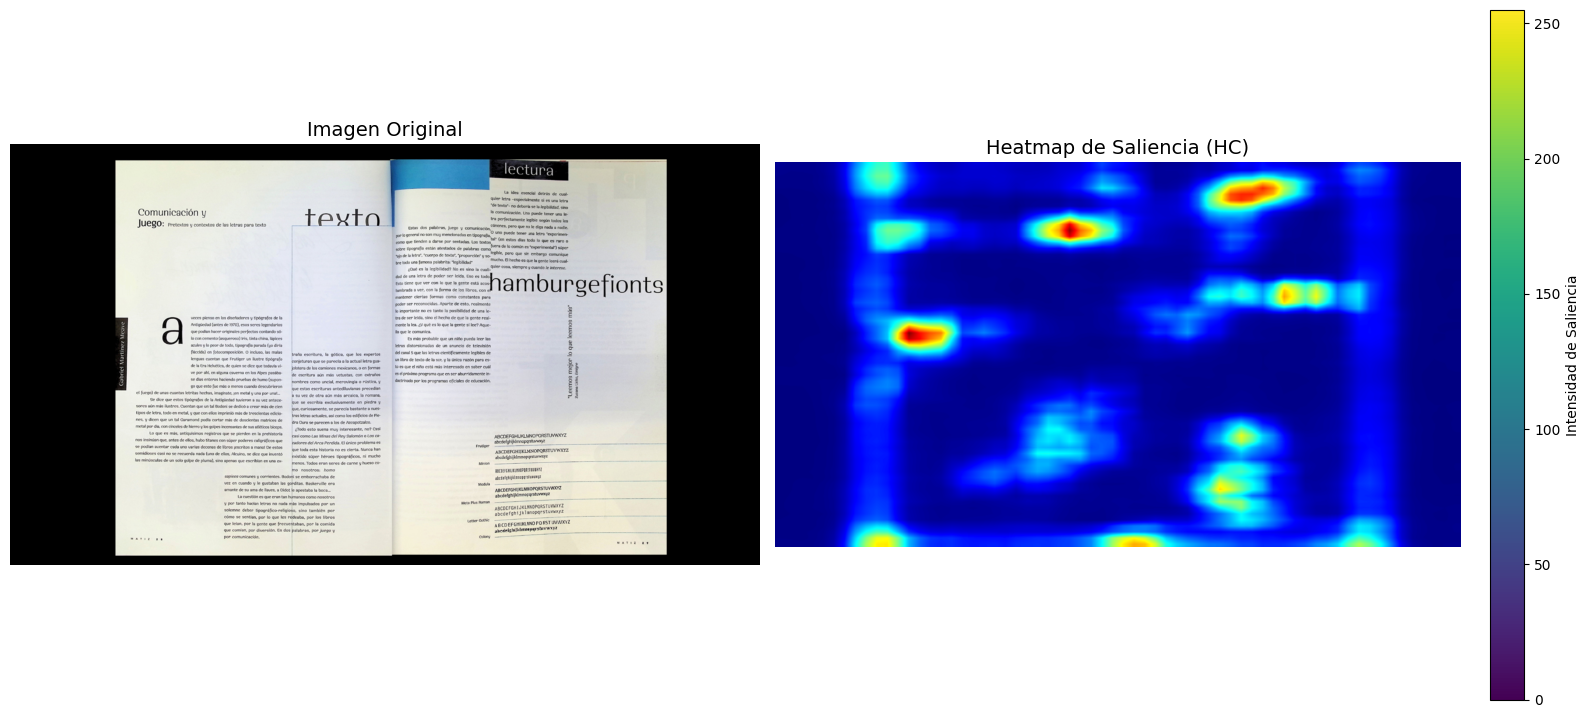

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Importar las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Cargar la imagen desde tu dispositivo local
uploaded = files.upload()

# Asumir que solo se subió un archivo y obtener su nombre
image_filename = list(uploaded.keys())[0]

# Leer la imagen utilizando OpenCV
image = cv2.imread(image_filename)

# Verificar si la imagen se cargó correctamente
if image is None:
    raise Exception("Error al cargar la imagen. Asegúrate de que el archivo es una imagen válida.")

# Crear un objeto de saliencia utilizando el método de Histogram-based Contrast
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()

# Computar el mapa de saliencia
(success, saliencyMap) = saliency.computeSaliency(image)

# Convertir el mapa de saliencia a una escala adecuada para visualizarlo
saliencyMap = (saliencyMap * 255).astype("uint8")

# Crear un heatmap a partir del mapa de saliencia
heatmap = cv2.applyColorMap(saliencyMap, cv2.COLORMAP_JET)

# Convertir el heatmap de BGR (OpenCV) a RGB (Matplotlib)
heatmap_rgb = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

# Convertir la imagen original de BGR a RGB para Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Crear una figura con dos subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Mostrar la imagen original en el primer subplot
axes[0].imshow(image_rgb)
axes[0].set_title('Imagen Original', fontsize=14)
axes[0].axis('off')

# Mostrar el heatmap de saliencia en el segundo subplot
heatmap_im = axes[1].imshow(heatmap_rgb)
axes[1].set_title('Heatmap de Saliencia (HC)', fontsize=14)
axes[1].axis('off')

# Agregar una barra de color al heatmap en el segundo subplot
cbar = fig.colorbar(heatmap_im, ax=axes[1], fraction=0.046, pad=0.04)
cbar.set_label('Intensidad de Saliencia')

# Ajustar el layout para que no se solapen los elementos
plt.tight_layout()

# Mostrar la figura con ambos gráficos
plt.show()

# Guardar la figura combinada si se desea
fig.savefig('original_y_heatmap_saliency.png', bbox_inches='tight', dpi=300)

# (Opcional) Descargar la imagen guardada
files.download('original_y_heatmap_saliency.png')
